In [1]:
# importing the libraries
import cv2 
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
import torch
from torchvision import transforms, models

In [2]:
# display function for comparing the images
def display_images(images,titles,cmap=None):
    plt.figure(figsize=(15, 5))
    for i,(image,title) in enumerate(zip(images,titles)):
        plt.subplot(1,len(images),i+1)
        plt.imshow(image,cmap=cmap)
        plt.title(title)
        plt.axis('off')
    plt.show()

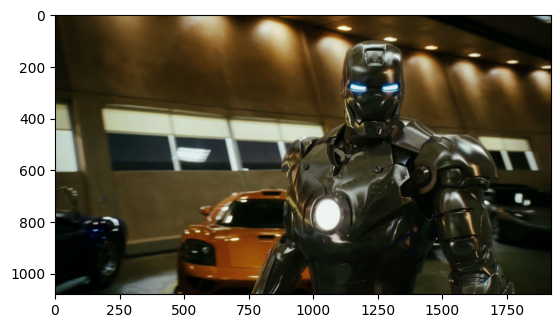

In [3]:
# reading the image
image_bgr = cv2.imread('iron-man.jpg')
image_rgb = cv2.cvtColor(image_bgr,cv2.COLOR_BGR2RGB)
image_gray = cv2.cvtColor(image_rgb,cv2.COLOR_RGB2GRAY)
plt.imshow(image_rgb)

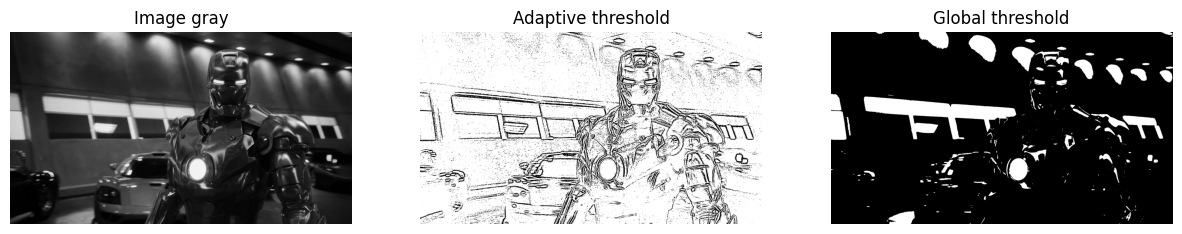

In [12]:
# traditional method 1 - adaptive threshold 
adaptive_thresh = cv2.adaptiveThreshold(image_gray,255,cv2.ADAPTIVE_THRESH_GAUSSIAN_C,cv2.THRESH_BINARY,11,2)
_ , global_thresh = cv2.threshold(image_gray,127,255,cv2.THRESH_BINARY)

display_images([image_gray,adaptive_thresh,global_thresh],['Image gray','Adaptive threshold','Global threshold'],cmap='gray')

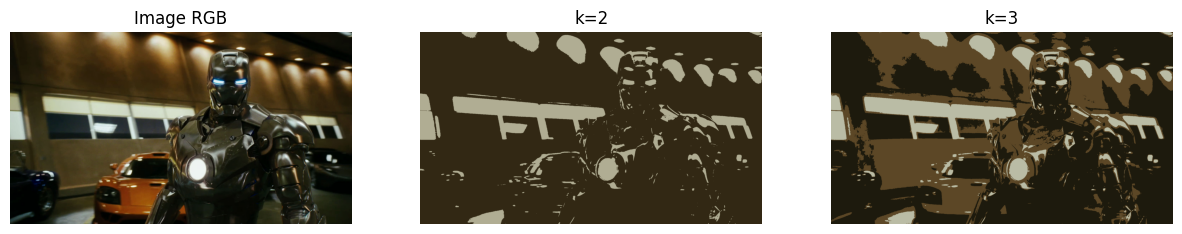

In [16]:
# traditional method 2 - Clustering 
k_vals = [2,3]

def cluster_image(image,k):
    image = image.reshape((-1,3))
    image = np.float32(image)
    criteria = (cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER,100,0.2)
    _,label,center = cv2.kmeans(image,k,None,criteria,10,cv2.KMEANS_RANDOM_CENTERS)
    center = np.uint8(center)
    segmented_image = center[label.flatten()]
    segmented_image = segmented_image.reshape(image_rgb.shape)
    
    return segmented_image

segmented_images = [image_rgb] + [cluster_image(image_rgb,k) for k in k_vals]
display_images(segmented_images,['Image RGB','k=2','k=3'],cmap='gray')

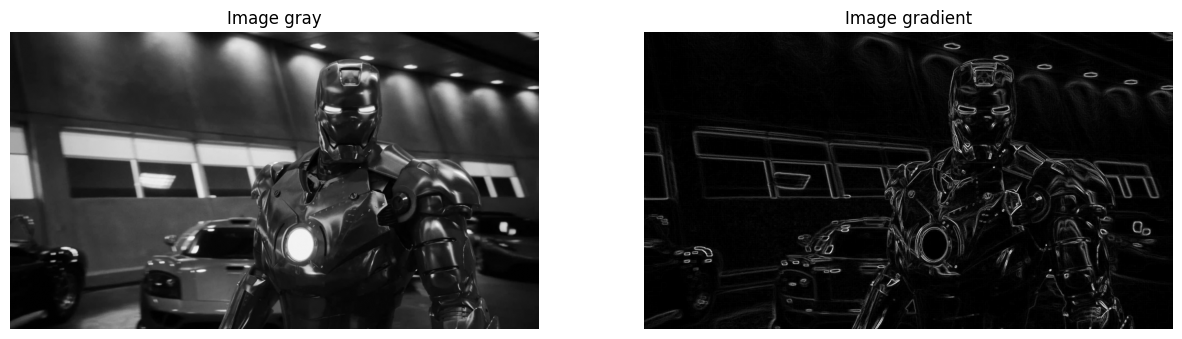

In [18]:
# Traditional method 3 - Edge based segmentation -  Sobel method
edge_image_x = cv2.Sobel(image_gray,cv2.CV_16S,1,0,ksize=3,scale=1,delta=0,borderType=cv2.BORDER_DEFAULT)
edge_image_y = cv2.Sobel(image_gray,cv2.CV_16S,0,1,ksize=3,scale=1,delta=0,borderType=cv2.BORDER_DEFAULT)
abs_grad_x,abs_grad_y = cv2.convertScaleAbs(edge_image_x),cv2.convertScaleAbs(edge_image_y)
image_grad = cv2.addWeighted(abs_grad_x,0.5,abs_grad_y,0.5,0)

display_images([image_gray,image_grad],['Image gray','Image gradient'],cmap='gray')